In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
dataset= pd.read_csv("per-capita-plastic-waste-vs-gdp-per-capita.csv")

In [3]:
print("The data set has {} rows and {} columns".format(dataset.shape[0], dataset.shape[1]))
display(dataset.describe())
display(dataset.head())
display(dataset.dtypes.value_counts())

The data set has 48168 rows and 7 columns


,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)"
count,48168.000000,186.000000,6407.000000,4.688300e+04
mean,1903.147442,0.179812,14926.095591,2.982790e+07
std,315.716839,0.123006,17739.754531,2.530860e+08
min,-10000.000000,0.010000,247.436540,9.050000e+02
25%,1859.000000,0.103000,3021.071807,2.017335e+05
50%,1920.000000,0.144000,8447.264179,1.542937e+06
75%,1975.000000,0.252000,19607.537075,5.886795e+06
max,2019.000000,0.686000,135318.754421,7.713468e+09


,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


object     3
float64    3
int64      1
Name: count, dtype: int64

In [4]:
dataset.shape

(48168, 7)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48168 entries, 0 to 48167
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               48168 non-null  object 
 1   Code                                                 46154 non-null  object 
 2   Year                                                 48168 non-null  int64  
 3   Per capita plastic waste (kg/person/day)             186 non-null    float64
 4   GDP per capita, PPP (constant 2011 international $)  6407 non-null   float64
 5   Total population (Gapminder, HYDE & UN)              46883 non-null  float64
 6   Continent                                            285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.6+ MB


In [6]:
dataset.dtypes

Entity                                                  object
Code                                                    object
Year                                                     int64
Per capita plastic waste (kg/person/day)               float64
GDP per capita, PPP (constant 2011 international $)    float64
Total population (Gapminder, HYDE & UN)                float64
Continent                                               object
dtype: object

In [7]:
dataset.head(300)

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN
...,...,...,...,...,...,...,...
295,Africa,NaN,1972,NaN,NaN,382838016.0,NaN
296,Africa,NaN,1973,NaN,NaN,393044000.0,NaN
297,Africa,NaN,1974,NaN,NaN,403646016.0,NaN
298,Africa,NaN,1975,NaN,NaN,414675008.0,NaN


I want to rename the column due that they have brackets

In [8]:
dataset.rename(columns={'Per capita plastic waste (kg/person/day)': 'capita plastic waste'}, inplace=True)

In [9]:
dataset.rename(columns={'GDP per capita, PPP (constant 2011 international $)': 'GDP per capita'}, inplace=True)

In [10]:
dataset.rename(columns={'Total population (Gapminder, HYDE & UN)': 'Total population'}, inplace=True)

In [11]:
dataset.duplicated().sum() 

0

In [12]:
dataset.isnull().sum()

Entity                      0
Code                     2014
Year                        0
capita plastic waste    47982
GDP per capita          41761
Total population         1285
Continent               47883
dtype: int64

In [13]:
dataset.isnull().sum().sum()

140925

# Visualization of missing values

In [14]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


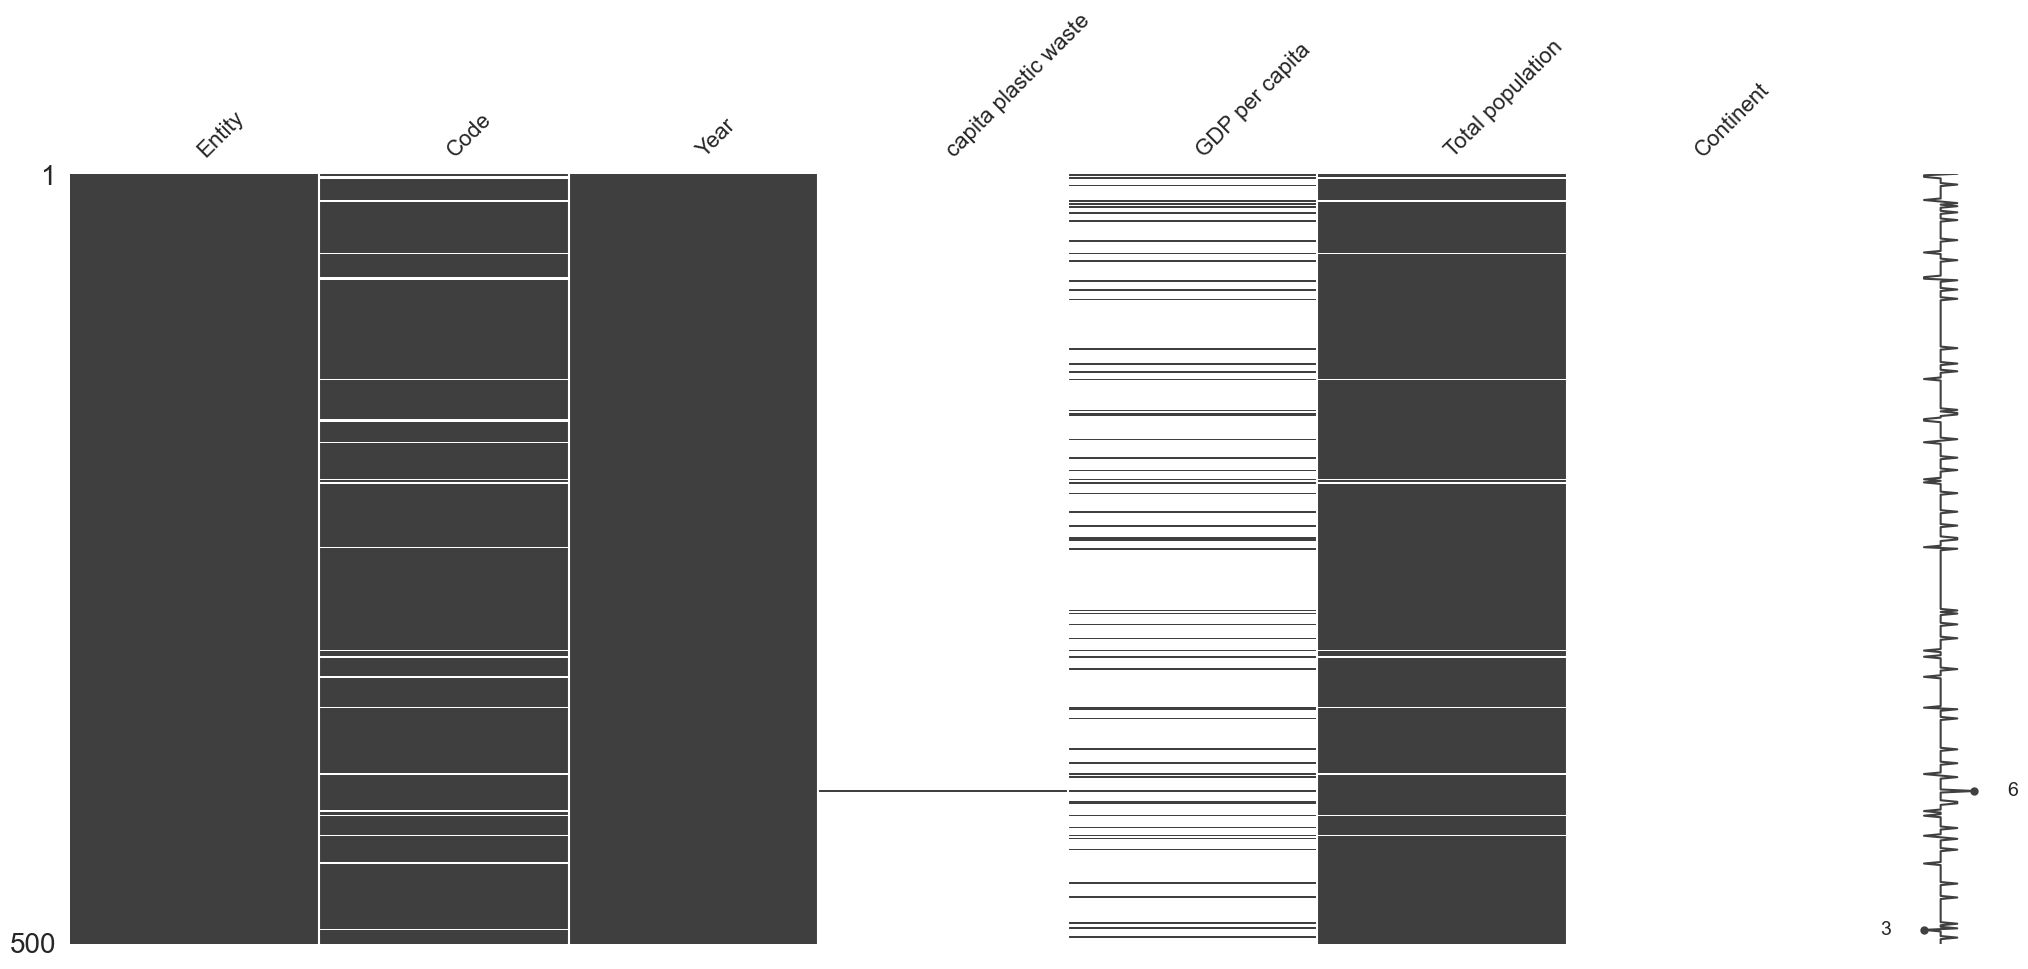

In [15]:
import missingno as msno

ax = msno.matrix(dataset.sample(500))

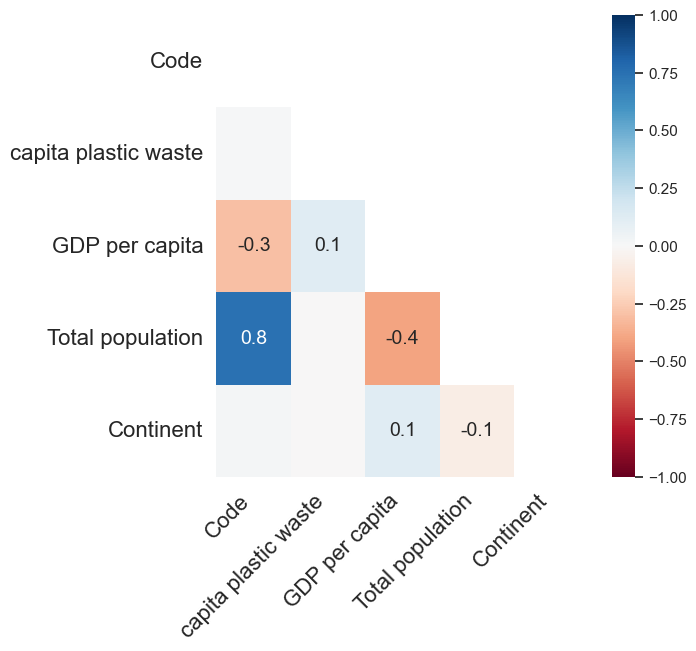

In [16]:
ax = msno.heatmap(dataset, figsize=(6, 6))

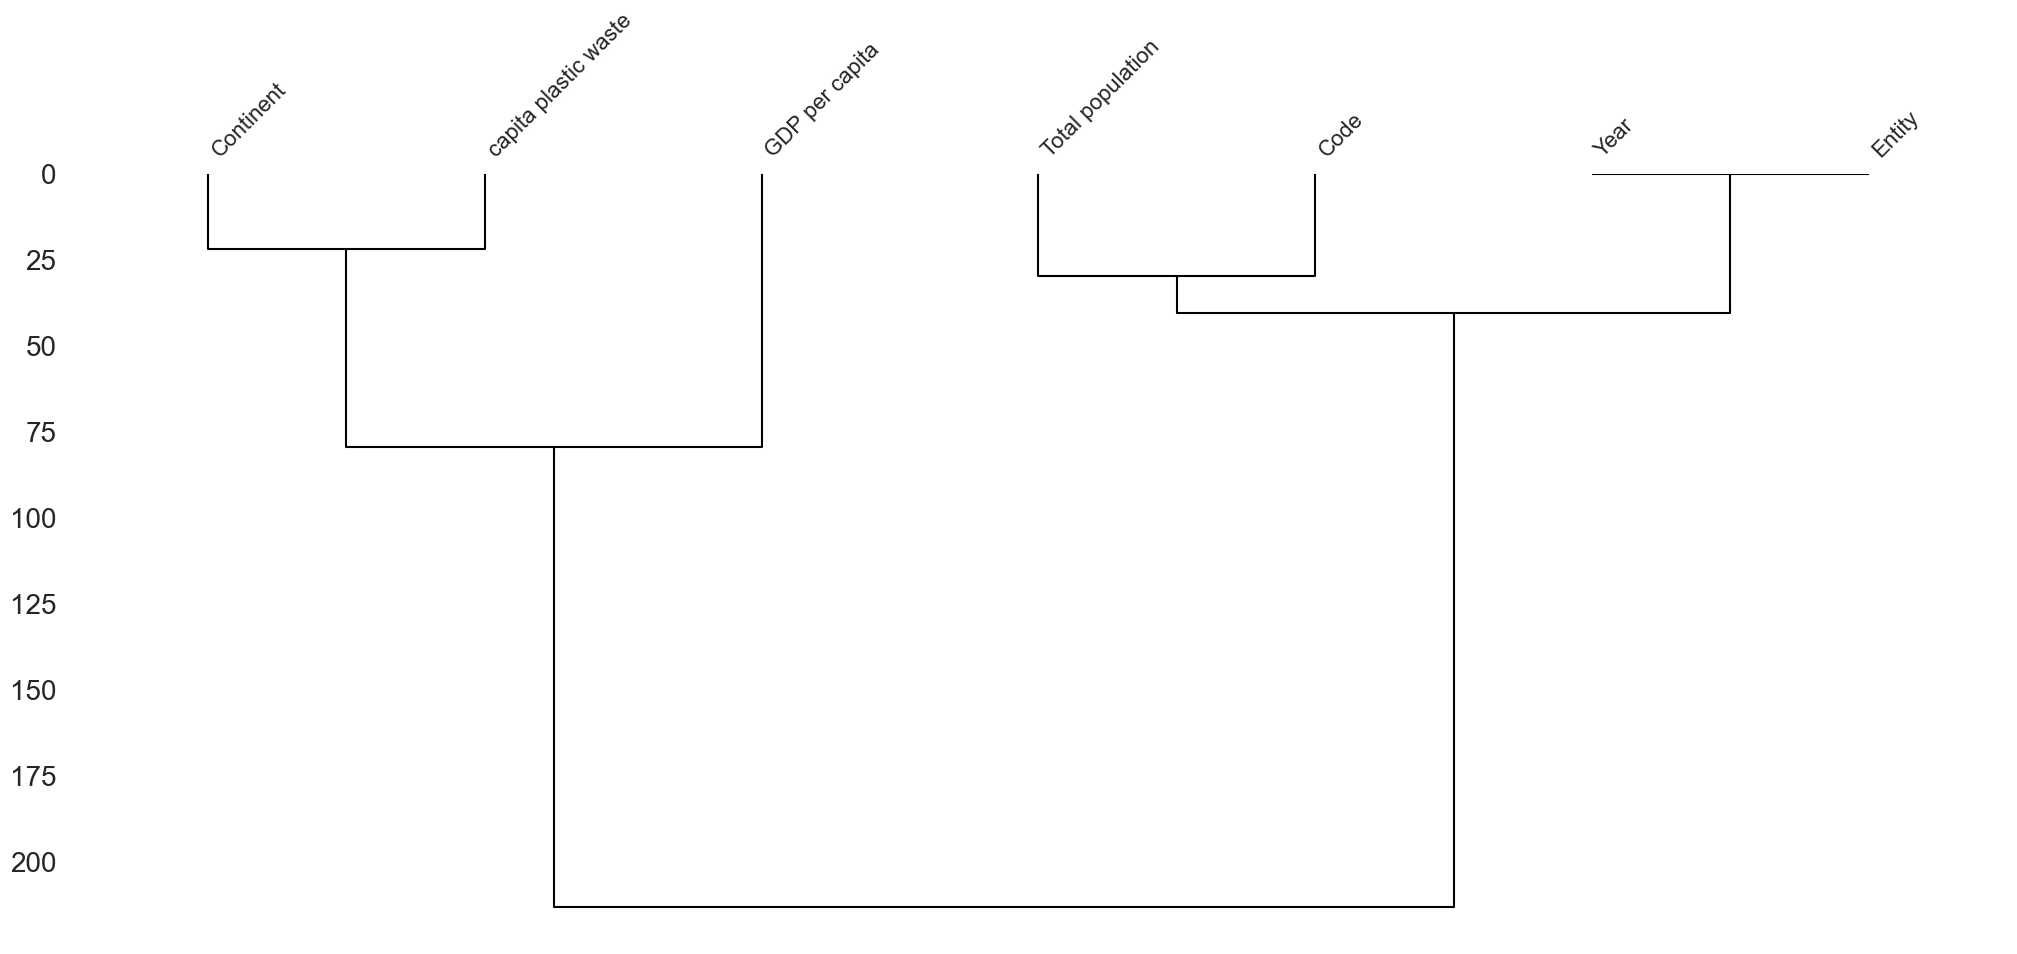

In [17]:
ax = msno.dendrogram(dataset)

# visualization:

In [18]:
print(dataset['Continent'])

0          Asia
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
48163       NaN
48164       NaN
48165       NaN
48166       NaN
48167    Europe
Name: Continent, Length: 48168, dtype: object


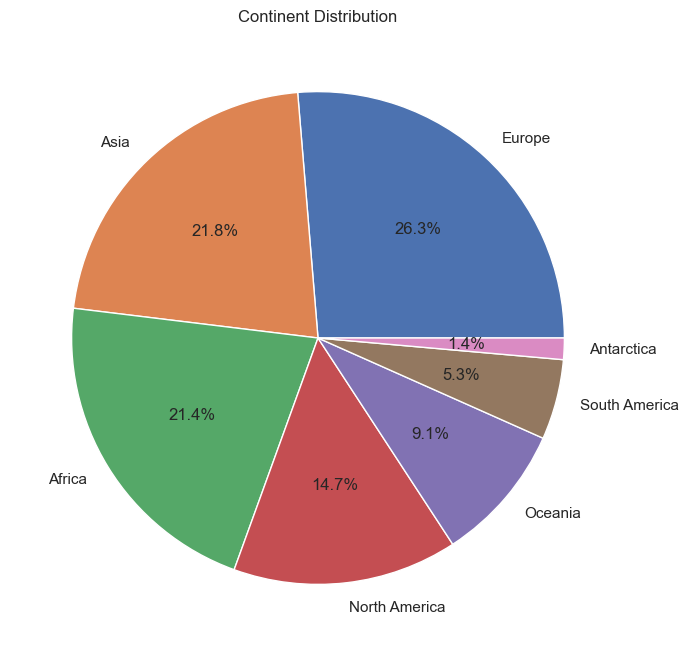

In [19]:
continent_counts = dataset['Continent'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(continent_counts, labels=continent_counts.index, autopct='%1.1f%%')
plt.title('Continent Distribution')
plt.show()

In [20]:
dataset.head()

,Entity,Code,Year,capita plastic waste,GDP per capita,Total population,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


# Handling Missing Values:

In [21]:
missing_values=["NA","N/A","-","NaN","missing","na","?"]

In [22]:
dataset.head()

,Entity,Code,Year,capita plastic waste,GDP per capita,Total population,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()
cn1 = list(dataset['Entity'].values)
le.fit(list(set(cn1)))
num_cn1 = list(le.transform(cn1))
dataset['Entity'] = num_cn1

le = LabelEncoder()
cn2 = list(dataset['Code'].values)
le.fit(list(set(cn2)))
num_cn2 = list(le.transform(cn2))
dataset['Code'] = num_cn2

le = LabelEncoder()
cn3 = list(dataset['Continent'].values)
le.fit(list(set(cn3)))
num_cn3 = list(le.transform(cn3))
dataset['Continent'] = num_cn3

I don't want to fill every column with the median due that for example the year is not necessary to fill the year and Entity because the missing value are 0

In [25]:
columns_to_fill = ['Code', 'capita plastic waste', 'GDP per capita', 'Total population', 'Continent']

dataset[columns_to_fill] = dataset[columns_to_fill].fillna(dataset[columns_to_fill].median())

In [26]:
dataset.head()

,Entity,Code,Year,capita plastic waste,GDP per capita,Total population,Continent
0,0,173,2015,0.144,8447.264179,1542937.0,2
1,1,1,2002,0.144,1063.635574,22601000.0,7
2,1,1,2003,0.144,1099.194507,23681000.0,7
3,1,1,2004,0.144,1062.249360,24727000.0,7
4,1,1,2005,0.144,1136.123214,25654000.0,7


In [27]:
dataset.isnull().sum()

Entity                  0
Code                    0
Year                    0
capita plastic waste    0
GDP per capita          0
Total population        0
Continent               0
dtype: int64

change from float into Integer:

In [28]:

# displaying the datatypes
display(dataset.dtypes)
 
# converting 'Field_2' and 'Field_3' from float to int
dataset['capita plastic waste'] = dataset['capita plastic waste'].apply(np.int64)
dataset['GDP per capita'] = dataset['GDP per capita'].apply(np.int64)
dataset['Total population'] = dataset['Total population'].apply(np.int64)
 
# displaying the datatypes
display(dataset.dtypes)

Entity                    int32
Code                      int32
Year                      int64
capita plastic waste    float64
GDP per capita          float64
Total population        float64
Continent                 int32
dtype: object

Entity                  int32
Code                    int32
Year                    int64
capita plastic waste    int64
GDP per capita          int64
Total population        int64
Continent               int32
dtype: object